In [1]:
import pandas as pd

# Remplacez 'chemin/vers/votre/fichier.csv' par le chemin réel vers votre fichier CSV
csv_path = 'googleplaystore.csv'

# Chargement du fichier CSV dans un DataFrame
df = pd.read_csv(csv_path)

# Affichage des premières lignes pour examiner la structure des données
print(df.head())


   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1     159   19M      10,000+  Free     0   
1  ART_AND_DESIGN     3.9     967   14M     500,000+  Free     0   
2  ART_AND_DESIGN     4.7   87510  8.7M   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5  215644   25M  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3     967  2.8M     100,000+  Free     0   

  Content Rating                     Genres Last Updated         Current Ver  \
0       Everyone               Art & Design     7-Jan-18               1.0.0   
1       Everyone  Art 

In [2]:
import pandas as pd

# Chargement du fichier CSV dans un DataFrame
csv_path = 'googleplaystore.csv'
df = pd.read_csv(csv_path)

# Affichage des premières lignes pour examiner la structure des données
df.head()


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


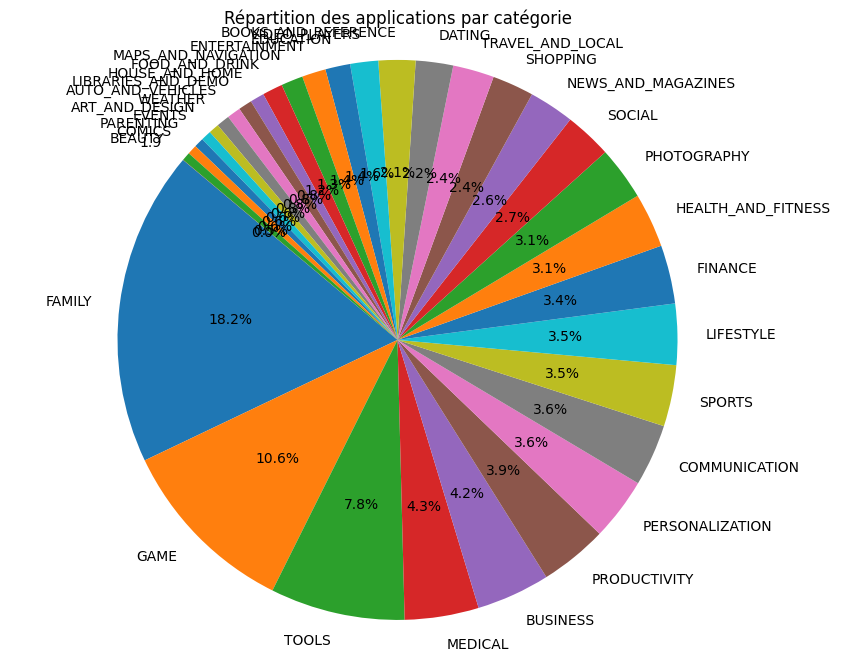

In [3]:
import matplotlib.pyplot as plt

# Nettoyage des données et préparation pour le diagramme circulaire des catégories
category_counts = df['Category'].value_counts()

# Génération du diagramme circulaire
plt.figure(figsize=(10, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des applications par catégorie')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


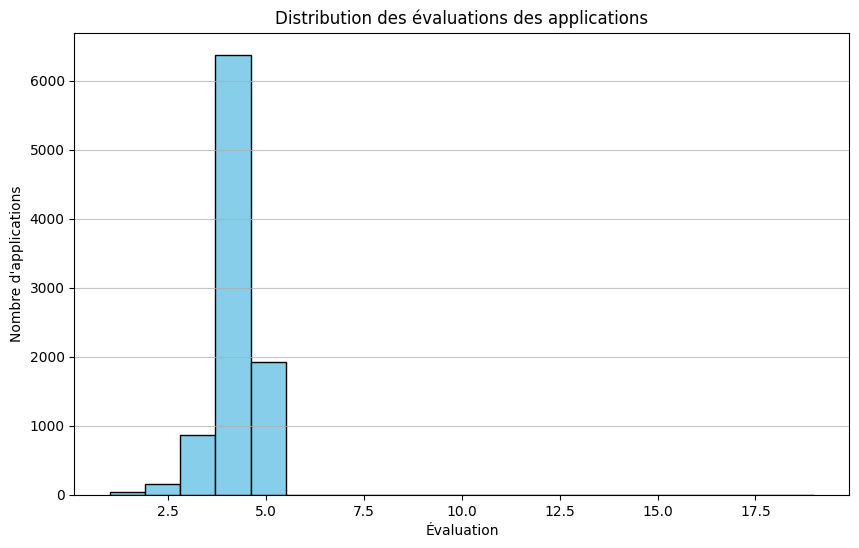

In [4]:
# Conversion de la colonne 'Rating' en numérique, suppression des valeurs non numériques
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df.dropna(subset=['Rating'], inplace=True)

# Génération de l'histogramme des évaluations
plt.figure(figsize=(10, 6))
plt.hist(df['Rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution des évaluations des applications')
plt.xlabel('Évaluation')
plt.ylabel('Nombre d\'applications')
plt.grid(axis='y', alpha=0.75)

plt.show()


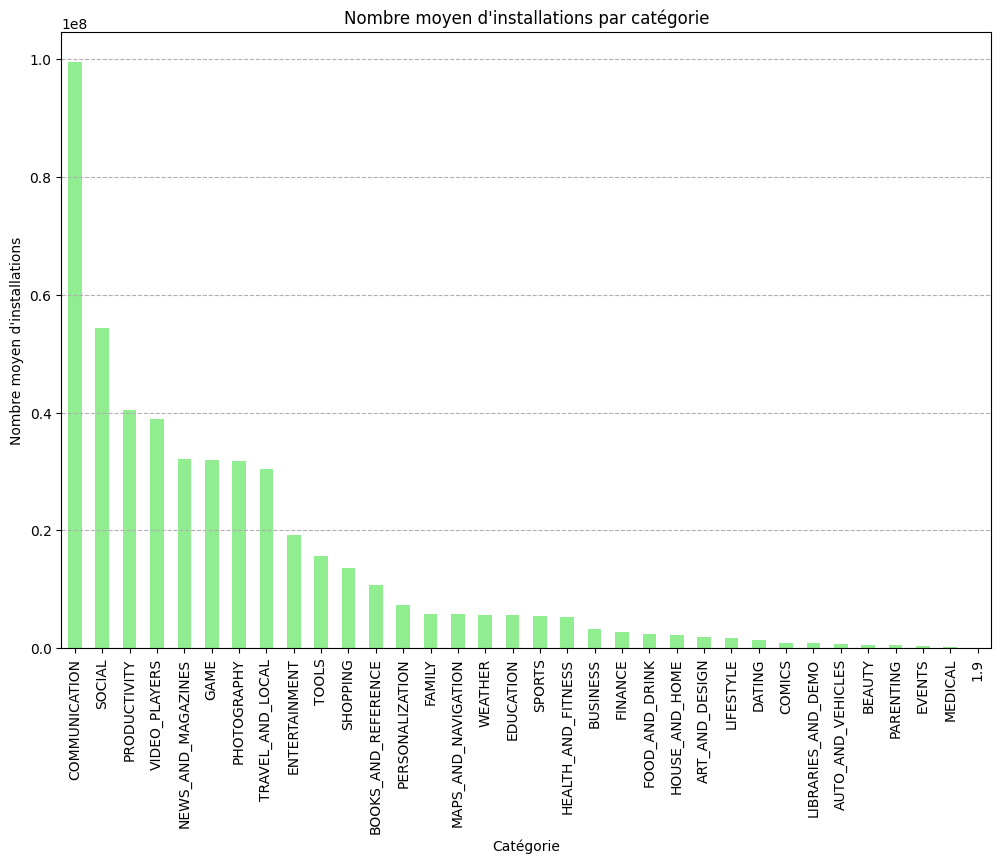

In [5]:
# Nettoyage des données dans la colonne 'Installs'
df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '')
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Calcul du nombre moyen d'installations par catégorie
average_installs_per_category = df.groupby('Category')['Installs'].mean().sort_values(ascending=False)

# Génération du diagramme en barres
plt.figure(figsize=(12, 8))
average_installs_per_category.plot(kind='bar', color='lightgreen')
plt.title('Nombre moyen d\'installations par catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Nombre moyen d\'installations')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--')

plt.show()


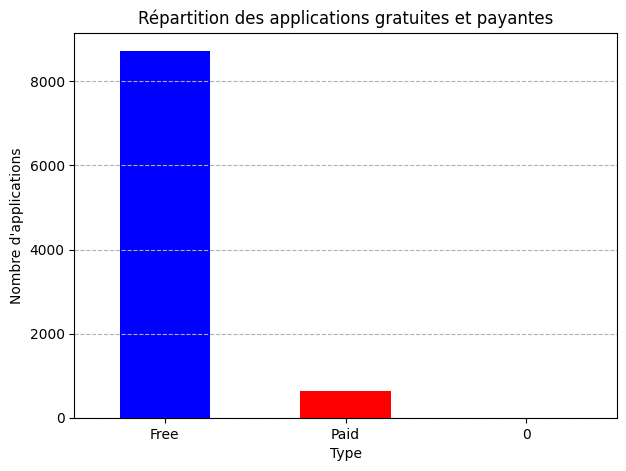

In [6]:
# Calcul du nombre d'applications gratuites vs payantes
free_vs_paid = df['Type'].value_counts()

# Génération du diagramme en barres
plt.figure(figsize=(7, 5))
free_vs_paid.plot(kind='bar', color=['blue', 'red'])
plt.title('Répartition des applications gratuites et payantes')
plt.xlabel('Type')
plt.ylabel('Nombre d\'applications')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

plt.show()


C:\Users\strix\AppData\Local\Temp\ipykernel_3596\2968976873.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')


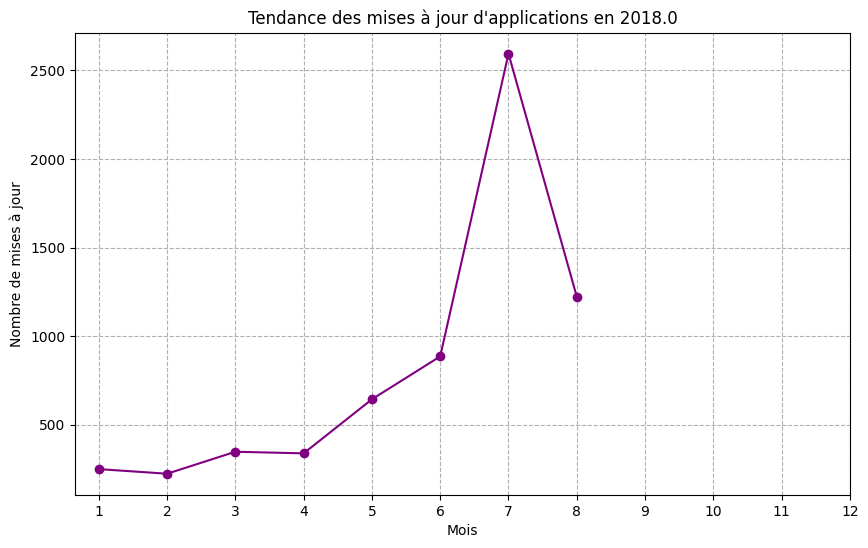

In [7]:
# Conversion de la colonne 'Last Updated' en datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

# Filtrage des données pour la dernière année disponible (nous devons d'abord trouver cette année)
last_available_year = df['Last Updated'].dt.year.max()

# Filtrage des mises à jour de la dernière année disponible
last_year_updates = df[df['Last Updated'].dt.year == last_available_year]

# Comptage du nombre de mises à jour par mois
updates_per_month = last_year_updates['Last Updated'].dt.month.value_counts().sort_index()

# Génération du graphique linéaire
plt.figure(figsize=(10, 6))
updates_per_month.plot(kind='line', marker='o', linestyle='-', color='purple')
plt.title(f'Tendance des mises à jour d\'applications en {last_available_year}')
plt.xlabel('Mois')
plt.ylabel('Nombre de mises à jour')
plt.xticks(range(1, 13))  # Assure que tous les mois sont affichés
plt.grid(axis='both', linestyle='--')

plt.show()
